## Part 1: Small world networks

### Reading

**For this part, we'll read the remaining part of Network Science Chapter 3, Section 3.5 - 3.10, with emphasis on 3.8 and 3.9.**

### Exercises: 
*Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.*

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**\
In real networks, there are outliers, for instance there can be large differences in how popular individuals are. This conflicts with random netweorks where, "in a large random network the degree of most nodes is in the narrow vicinity of ‹k›"(Section 3.5).


**List the four regimes that characterize random networks as a function of ⟨k⟩.**
- Sub-critical regime
- Critical point
- Super-critical regime
- The connected regime

**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**
Because according to the theory of random networks, the clustering coefficient is independent of the degree (k), and is instead dependent on number of nodes (N). While real world networks have been shown to have a clustering coefficient dependent on k, but largly not effected by N. This also results in an inability for random network to capture the small-world phenomenon.

*The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using networkx, writing loops, and plotting nice figures.*

### Exercises: WS edition.

**First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and1. Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.**

In [1]:
import networkx as nx

In [2]:
#Creating the three Watts Stogatz networks
WS_p0=nx.watts_strogatz_graph(500,4,0)
WS_p01=nx.watts_strogatz_graph(500,4,0.1)
WS_p1=nx.watts_strogatz_graph(500,4,1)

In [3]:
# Calculated the avg. shortest path length.
print("Average shortest path lenght (<d>)")
print("")
avg_d_WS_p0=nx.average_shortest_path_length(WS_p0)
print("WS with p=0: {}".format(avg_d_WS_p0))
avg_d_WS_p01=nx.average_shortest_path_length(WS_p01)
print("WS with p=0.1: {}".format(avg_d_WS_p01))
avg_d_WS_p1=nx.average_shortest_path_length(WS_p1)
print("WS with p=1: {}".format(avg_d_WS_p1))

Average shortest path lenght (<d>)

WS with p=0: 62.875751503006015
WS with p=0.1: 8.864448897795592
WS with p=1: 4.753498997995992


We se that as p increses, $⟨d⟩$ decreses. When p=1 the network has become a random network (chapter 3, Box 3.9), where the low $⟨d⟩$ captures the small world property, as the average shortest path length is propotibal to the network size.

In [4]:
import numpy as np

# average shortes distances in random networks.
print("⟨𝑑⟩ for random network with N=500 and   ⟨k⟩=4")
print(np.log(500)/np.log(4))

⟨𝑑⟩ for random network with N=500 and   ⟨k⟩=4
4.4828921423310435


**Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (i.e. the value you find when p=1).**

Not a meaningful question, so not answered.

**Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [5]:
networks=[]
P=np.sort([0,0.01,0.03,0.05,0.1,0.2])

#Generting networks
for p in P:
    networks.append([nx.watts_strogatz_graph(500,4,p) for i in range(50)])
    

In [6]:
# Calculaing ⟨d⟩ for all networks
networks_d=[]

for n in range(len(networks)):
    networks_d.append([nx.average_shortest_path_length(i) for i in networks[n]])

In [7]:
# Caluclating average ⟨d⟩
networks_avg_d=[]

for n in range(len(networks)):
    networks_avg_d.append(np.mean(networks_d[n]))

In [8]:
# Calculating standard deviation
networks_std_d=[]

for n in range(len(networks)):
    networks_std_d.append(np.std(networks_d[n]))

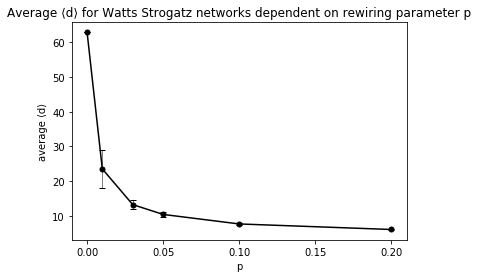

In [9]:
import matplotlib.pyplot as plt

plt.errorbar(P,networks_avg_d,networks_std_d,marker='o',markersize=5,capsize=3,elinewidth=0.5,color='k')
plt.xlabel("p")
plt.ylabel("average ⟨d⟩")
plt.xticks([0,0.05,0.1,0.15,0.2])
plt.title("Average ⟨d⟩ for Watts Strogatz networks dependent on rewiring parameter p")
plt.show()

# Part 2: Scale-free networks

### Reading
- *Chapter 4, Section 4.1 - 4.7.*

- *Chapter 5, section 5.1 - 5.5.*

### Exercises: BA edition

*First a couple of questions to make sure that you've actually read the text.*

**What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
- **Anomalous Regime (γ≤ 2):** Networks belonging to this regime are very rare, as there serveral fundamental problems with having γ≤ 2. One of the main problems being that for large neworks, the growth in number of connections to the hub, exceeds the number of nodes in the network (section 4.7). This means that unless multi-links are allowed, networks beloning to the Anomalous regime cannot exist, for other than very small networks.

- **Scale-Free Regime (2 ‹ γ ‹ 3):** Networks belonging to this regime are ultra-small, which describe the quality that by linking very often to the hub, the distances become very short. This is the regime which contains many prominent networks. 


- **Random Network Regime (γ › 3):** Networks beloning to this regime appear similar to random networks. This is due to the fact that for large values of γ, the degree distribution decrease fast, which means that there are only few hubs, and those that are, are small. To observe whether or not a network belongs to this regime or are indeed random, it requires a large number of observations ($N=(\frac{k_{max}}{k_{min}})^{\gamma- 1}$).

**What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
- **Sublinear Preferential Attachment (0 < α < 1):** With $\alpha$ representing how strong the preferential attachement is. such low values result in a stretched exponential distribution (section 5.8). THe result is much fewer and smaller hubs, reflecting in the slow growth of $k_{max}$.


- **Linear Regime (α=1):** The linear regime correspond to Barabási-Albert model, with a power law degree distibution (section 5.8).


- **Superlinear Regime (α > 1):** Networks beloining to this regime, developes super-hubs, consisting of the earliest added nodes. This is due to the fact that the high $\alpha$ amplify the effect of the preferential attachment, so that already high degree nodes, are muche more likely to attract linkes from newly added nodes.

*We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success*

- **First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).**

In [10]:
G1=nx.Graph([(1,2)])

- **Now add another node, connecting one of the existing nodes in proportion to their degree.**

In [11]:
import random

In [12]:
# Adding a new node '3'
G1.add_node(3)

# Getting a list of nodes, with occurences propotional to the nodes degree
l=[n for edge in list(G1.edges()) for n in edge]
#selecting node to connect to
new_connection=random.choice(l)

#adding new connection
G1.add_edge(3,new_connection)

- **Keep going until you have a 100 node network.**

    **Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.**

In [13]:
#adding additional nodes with connections
for i in range(4,101):
    G1.add_node(i)
    
    l=[n for edge in list(G1.edges()) for n in edge]
    G1.add_edge(i,random.choice(l))

    
#Checking that there are now indeed 100 nodes
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

- **Plot the network**

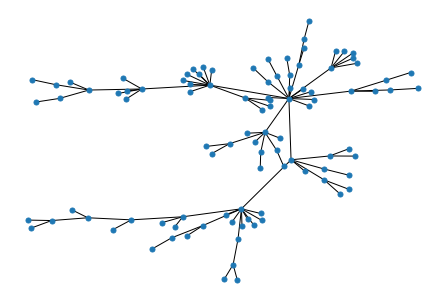

In [29]:
nx.draw(G1, node_size=25)

- **Add more nodes until you have a 5000 node network.**

In [30]:
#adding additional nodes with connections
for i in range(101,5001):
    G1.add_node(i)
    
    l=[n for edge in list(G1.edges()) for n in edge]
    G1.add_edge(i,random.choice(l))


- **What's the maximum and minimum degree?**

In [51]:
degree_list=[d for n, d in G1.degree()]

max_degree=np.max(degree_list)
min_degree=np.min(degree_list)

print("Max degree:{}".format(max_degree))
print("Min degree:{}".format(min_degree))

Max degree:109
Min degree:1


- **Now, bin the degree distribution using numpy.histogram.**

In [81]:
degree_count,bins=np.histogram(degree_list,bins=np.arange(1,111))

- **Plot the distribution. Plot it with both linear and log-log axes.**

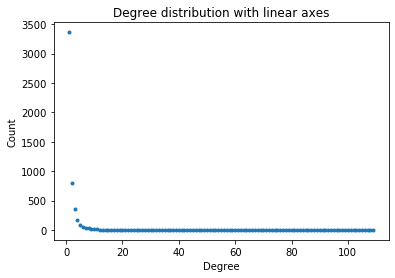

In [104]:
plt.plot(np.arange(1,110),degree_count,'o',markersize=3)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution with linear axes")
plt.show()

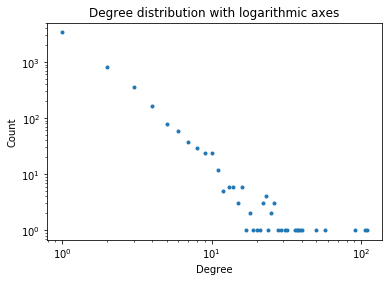

In [108]:
plt.plot(np.arange(1,110),degree_count,'o',markersize=3)
plt.xlabel("Degree")
plt.xscale("log")
plt.ylabel("Count")
plt.yscale("log")
plt.title("Degree distribution with logarithmic axes")
plt.show()

**Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:**

- **Pick a node i at random (e.g. use random.choice). Find its degree.**

In [138]:
node_i=random.choice(list(G1.nodes()))
print("Node {} has been picked, and has a degree of {}.".format(node_i,G1.degree(node_i)))


Node 2149 has been picked, and has a degree of 1.


- **Find i's neighbors. And calculate their average degree.**

In [139]:
neighbor_degrees=[]
for neighbor in G1.neighbors(node_i):
    neighbor_degrees.append(G1.degree(neighbor))

avg_degree_neighbor=np.mean(neighbor_degrees)
print("Average degree of neighbours: {}".format(avg_degree_neighbor))

Average degree of neighbours: 23.0


- **Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.**

On the last run of the code, the degree of the randomly choosen i was 1, while the average degree of it was 23. This corresponds to friends on average have more friends than i.

- **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [141]:
is_paradox_true=0
for i in range (1000):
    node_i=random.choice(list(G1.nodes()))
    neighbor_degrees=[]
    for neighbor in G1.neighbors(node_i):
        neighbor_degrees.append(G1.degree(neighbor))
    avg_degree_neighbor=np.mean(neighbor_degrees)
    if G1.degree(node_i)<avg_degree_neighbor:
        is_paradox_true+=1
    
print("The friendship paradox was true {} times out of 1000".format(is_paradox_true))   

The friendship paradox was true 874 times out of 1000


**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.**

This corresponds to a Erdos Renyi network. To build it we therefore need to know N and p. Since the network should bethe same size we already know N=5000. However p is not known and must first be calculated. To do this the following equation is used (chapter 3, equation 3.3)

$⟨k⟩=p(N−1) $

From the equation we can see that we need to know the average degree ⟨k⟩, in order to determine p.

In [143]:
avg_k=np.mean(degree_list)
print("⟨𝑘⟩ = {}".format(avg_k))

⟨𝑘⟩ = 1.9996


We can now calculate p

In [145]:
p=avg_k/(5000-1)
print("p = {}".format(p))

p = 0.0004


The network can now be created.

In [147]:
ER=nx.erdos_renyi_graph(5000,p)

- **Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.**

To show the differences we start by taking a look at the degree distrubution for the new ER network.

In [150]:
degree_list_ER=[d for n, d in ER.degree()]

max_degree_ER=np.max(degree_list_ER)


degree_count_ER,bins_ER=np.histogram(degree_list_ER,bins=np.arange(0,max_degree_ER+2))

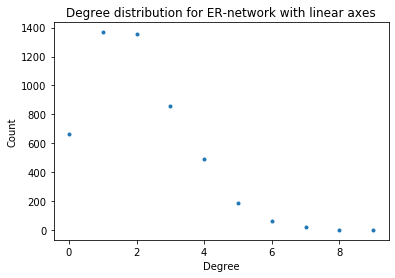

In [156]:
plt.plot(np.arange(0,max_degree_ER+1),degree_count_ER,'o',markersize=3)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution for ER-network with linear axes")
plt.show()

The degree distribution for the ER network, appear to be following a binomial distribution, as would be expected (chapter 3.4). This is in contrast to the degree distribution of the BA network, which appeared to be follow a power-law (chapter 5.5). While the behaviour is expected based on the theory of the two different network types, it is also makes sense in the light of the difference in the presence of preferential attachment. The element of preferential attachment in the BA network, means that nodes are more likely to connect to the mosted connected nodes, which result in a distribution where most nodes have only very few connections, while a few nodes have a high number of connections. This exactly what could be observed i the degree distribution of the BA. However without the preferential attachment nodes are equally likely to connect to any node. This means that the degree distribution centers around ⟨𝑘⟩, but also that the highest observed degree becomes much lower.

Observing the number of connected components in the BA network, it is not surprising that there is only one connected component, as the network was initialized with two connected nodes, and all later added nodes had one connection. However this development can be understood in contrast to the ER network where nodes are not required to be connected, allowing for serveral connected components. Furthermore the lack of preferiental attachment in ER network drives up the number of connected components, since a preference for connecting to well-connected nodes would have increased the probability of creating links between the connected components.

In [161]:
print("Number of connected components in BA: {}".format(nx.number_connected_components(G1)))
print("Number of connected components in ER: {}".format(nx.number_connected_components(ER)))

Number of connected components in BA: 1
Number of connected components in ER: 789
